#### Import libraries

In [6]:
%matplotlib inline
import imageio
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img_matrix = imageio.imread('images/galaxia.jpg')

img = Image.fromarray(img_matrix, 'L')
img.show()

#### Image histogram

Text(0.5,1,'Image histogram')

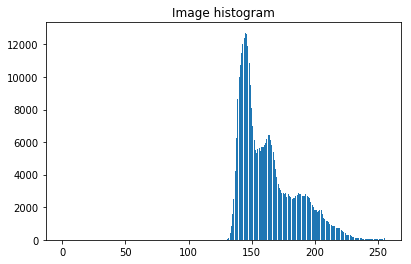

In [8]:
rows, cols = img_matrix.shape

histogram = np.zeros(256)

for x in range(0, cols):
    for y in range(0, rows):
        histogram[img_matrix[y,x]]=histogram[img_matrix[y,x]]+1

plt.figure(figsize=(14, 4))
ax = plt.subplot(1,2,1)
ax.bar(range(256), histogram)
plt.title("Image histogram")

#### Equalization

In [9]:
histogram_eq = histogram/(rows*cols)
accum = np.zeros(256)

accum[0] = histogram_eq[0]

for i in range(1, 255):
    accum[i] = accum[i-1] + histogram_eq[i]

image_new = np.zeros((rows, cols), dtype=np.uint8)

for x in range (rows):
    for y in range(cols):
        image_new[x,y] = np.abs(np.floor(255 * accum[img_matrix[x,y]]))

In [11]:
img_new = Image.fromarray(image_new, 'L')
img_new.show()

#### New histogram

Text(0.5,1,'Image histogram')

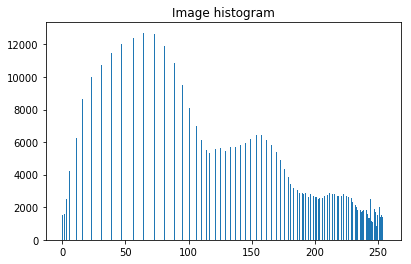

In [10]:
histogram = np.zeros(256)

for x in range(0, cols):
    for y in range(0, rows):
        histogram[image_new[y,x]]=histogram[image_new[y,x]]+1
        
plt.figure(figsize=(14, 4))
ax = plt.subplot(1,2,1)
ax.bar(range(256), histogram)
plt.title("Image histogram")